<a href="https://colab.research.google.com/github/pranilbasu/ML-Projects/blob/main/DL_Project_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
data = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [3]:
# dataset
dataset_1 = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_1.iloc[:, 1:2].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a Data structure with 60 timesteps
X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # reshaping the data

In [7]:
X_train.shape[1]

60

### Building the RNN Model

In [8]:
# libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [9]:
#Initialisation of RNN
rnn = Sequential()

In [10]:
# Adding the first LSTM layer
rnn.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
rnn.add(Dropout(0.2))

In [11]:
# Adding the second LSTM Layer
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [12]:
# Adding the third LSTM Layer
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [13]:
# Adding the fourth LSTM Layer
rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.2))

In [14]:
rnn.add(Dense(units = 1)) # output layer

In [15]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')  #Compilation of RNN

In [16]:
rnn.fit(X_train, Y_train, epochs = 100, batch_size = 32)  # training the RNN 

Epoch 1/100
38/38 [==============================] - 15s 136ms/step - loss: 0.0409
Epoch 2/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0043
Epoch 13/100

In [17]:
from google.colab import files
data = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [18]:
# importing real data
dataset_2 = pd.read_csv('Google_Stock_Price_Test.csv')
testing_data = dataset_2.iloc[:, 1:2].values

In [19]:
# Predicted Stock Price
dataset_total = pd.concat((dataset_1['Open'], dataset_2['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the result

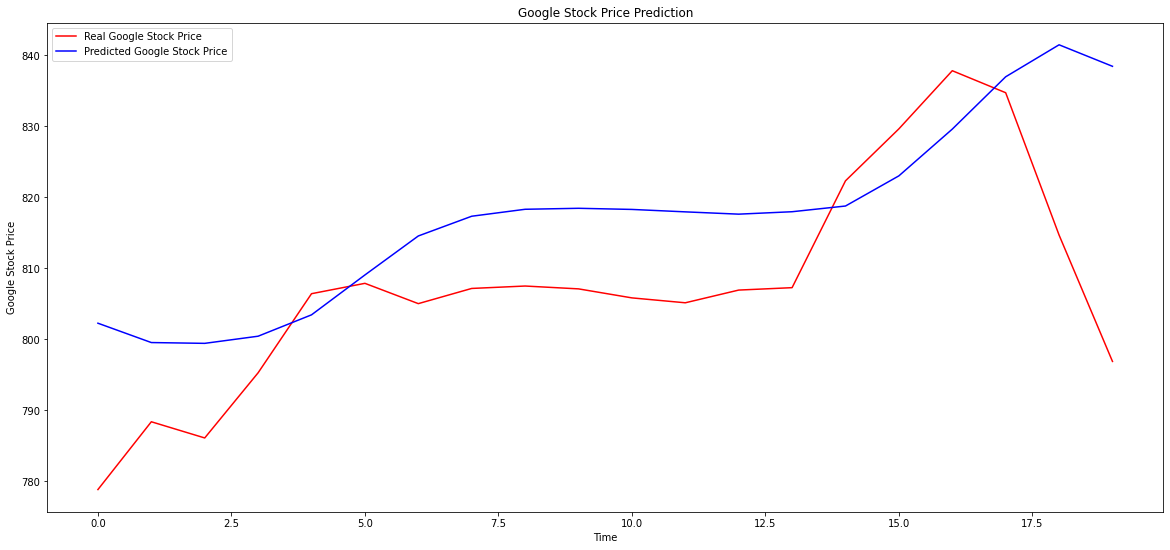

In [23]:
plt.figure(figsize =  (20,9))
plt.plot(testing_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()